### Финальный проект

Набор дынных
- https://www.kaggle.com/datasets
- https://huggingface.co/datasets
- свой набор данных

Требования к проекту 
- загрузить данные
- провести описание данных и колонок
- провести первичный анализ (статистики: mean, max,min, квантили и так далее ) и сделать выводы
- провести анализ на пропуски/дубликаты в данных, сделать выводы, провести работу над исправить ( если нет пропусков, то искусственно сделать пропуски и показать как работать с ними) 
- провести анализ на выбросы, сделать выводы, провести работу над исправлением этой проблемы
- провести анализ использую 2-3 группировки ( groupby) для получаения статистик и сделать выводы
- провести визуализацию, построить 3-4 графика, обязательно построить гистограммы и распредление данных, сделать выводы 

In [165]:
# 1) Загрузка данных 
# Взял Датасет https://www.kaggle.com/datasets/jaceprater/smokers-health-data/data

In [166]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('smoking_health_data_final.csv')
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [167]:
#2) Описание данных и колонок:
# Данные были отфильтрованы из набора данных о риске гипертонии, подготовленного доктором медицинских наук Райханом Каном. 
# Данные подходят для выяснения, как курение влияет на здоровье по сравнению с некурящими людьми
# Интересен также возраст опрошенных групп населения, и данные об их показателях здоровья

# age - возраст каждого опрошенного (int - целое число)
# sex - пол опрошенного (string - "male"/"female")
# current_smoker - является ли человек курильщиком или нет (bool - true/false)
# health_rate - частота сердечных сокращений человека (int - целое число)
# blood_pressure - давление человека (string - уникальный формат двух чисел через слеш: "122.5/80")
# cigs_per_day - количество выкуренных за день сигарет (int - число)
# chol - уровень холестирина человека (int - число)

In [168]:
#3) Первичный анализ:

print("Посмотрим описание информации в колонках")
df.describe()

Посмотрим описание информации в колонках


,age,heart_rate,cigs_per_day,chol
count,3900.000000,3900.000000,3886.000000,3893.000000
mean,49.537949,75.688974,9.168554,236.595941
std,8.559275,12.015376,12.037999,44.375365
min,32.000000,44.000000,0.000000,113.000000
25%,42.000000,68.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,70.000000,143.000000,70.000000,696.000000


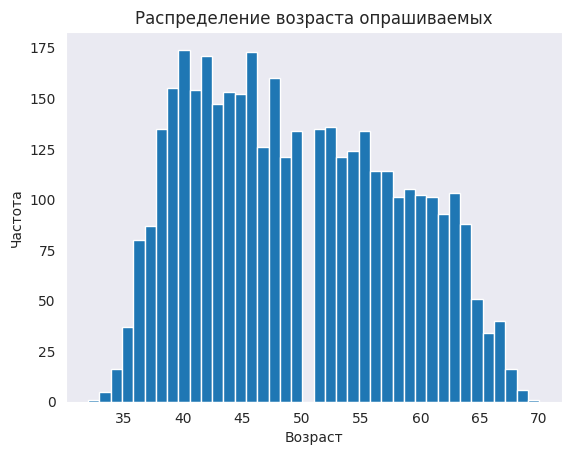

In [169]:
# Выведем гистограмму распределения возраста:
plt.hist(df['age'], bins=40)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста опрашиваемых')

plt.show()


In [170]:
print("По распределению видно, к примеру, что среди опрошенных людей - средний возраст 49.5 лет, причем основная группа людей попадает в интервал от 42 до 56 лет,\n учитывая, что минимальный возраст 32 и максимальный возраст 70 - делаем вывод, что возрастная группа сильно сконцентрирована в основном в интервале\n от 35 до 65 лет, причем интервал возрастов рассматриваемых в датасете - относительно небольшой (нету людей младше 32 лет, или старше 70)")

По распределению видно, к примеру, что среди опрошенных людей - средний возраст 49.5 лет, причем основная группа людей попадает в интервал от 42 до 56 лет,
 учитывая, что минимальный возраст 32 и максимальный возраст 70 - делаем вывод, что возрастная группа сильно сконцентрирована в основном в интервале
 от 35 до 65 лет, причем интервал возрастов рассматриваемых в датасете - относительно небольшой (нету людей младше 32 лет, или старше 70)


In [171]:
print("Также видно по столбцу count что неравное количество данных в разных колонках, что говорит о том что данные в колонках cigs_per_day и chol - не полностью заполнены. \nРассмотрим подробнее:")

Также видно по столбцу count что неравное количество данных в разных колонках, что говорит о том что данные в колонках cigs_per_day и chol - не полностью заполнены. 
Рассмотрим подробнее:


In [172]:
# 4) провести анализ на пропуски/дубликаты в данных, сделать выводы, провести работу над исправить 
# ( если нет пропусков, то искусственно сделать пропуски и показать как работать с ними) 


missing_values = df.isnull().sum()
print("Количество пропущенных значений в колонках:\n", missing_values)

Количество пропущенных значений в колонках:
 age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol               7
dtype: int64


In [173]:
# Рассмотрим где пропущен параметр cigs_per_day:
df.loc[df['cigs_per_day'].isna()]

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0
5,57,male,yes,62,107.5/72.5,NaN,223.0
6,43,male,yes,75,109.5/69,NaN,222.0
7,42,male,yes,66,123/73,NaN,196.0
8,37,male,yes,65,123.5/77,NaN,188.0
9,49,male,yes,93,127.5/81.5,NaN,256.0


In [174]:
# Можем дозаполнить колонку для этих строк средним значением по количеству выкуренных в день сигарет:
df['cigs_per_day'] = df['cigs_per_day'].fillna(round(df['cigs_per_day'].mean()))
df

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,9.0,219.0
1,45,male,yes,64,121/72,9.0,248.0
2,58,male,yes,81,127.5/76,9.0,235.0
3,42,male,yes,90,122.5/80,9.0,225.0
4,42,male,yes,62,119/80,9.0,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60.0,254.0
3896,49,male,yes,70,123/75,60.0,213.0
3897,56,male,yes,70,125/79,60.0,246.0
3898,50,male,yes,85,134/95,60.0,340.0


In [175]:
# Проверим теперь выборку на дубликаты:
print("Количество дублированных строк: ", df.duplicated().sum())

Количество дублированных строк:  0


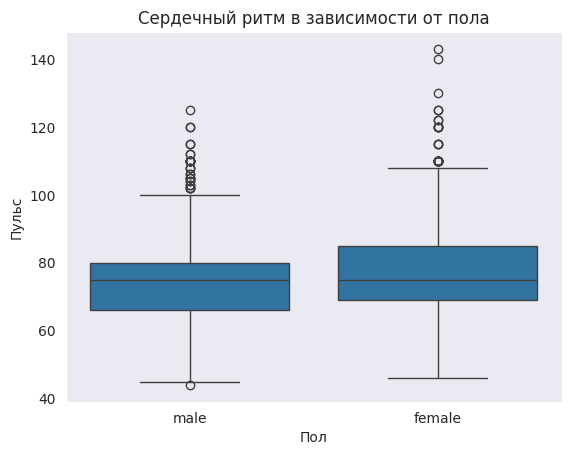

Здесь видны выбросы в виде точек, попадающих выше чем 'Верхний ус'. 
Удалим эти точки, являющиеся выбросами:


In [176]:
# 5) Провести анализ на выбросы, сделать выводы, провести работу над исправлением этой проблемы

# Для нахождения выбросов нарисуем boxplot'ы колонок Пола и Сердечного ритма:
sns.boxplot(x=df['sex'], y=df['heart_rate'])
plt.xlabel('Пол')
plt.ylabel('Пульс')
plt.title('Сердечный ритм в зависимости от пола')
plt.show()
print("Здесь видны выбросы в виде точек, попадающих выше чем \'Верхний ус\'. \nУдалим эти точки, являющиеся выбросами:")

In [177]:
print("Сами строки, соответствующие точкам выброса:")
idxs1 = df[(df['heart_rate'] > 100) & (df['sex'] == 'male')].index
df_cl = df.copy()
df_cl = df.drop(idxs1)
idxs2 = df_cl[(df_cl['heart_rate'] > 104) & (df_cl['sex'] == 'female')].index
df_cl = df_cl.drop(idxs2)
df[((df['heart_rate'] > 100) & (df['sex'] == 'male')) | ((df_cl['heart_rate'] > 104) & (df_cl['sex'] == 'female'))]

Сами строки, соответствующие точкам выброса:


,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
27,58,male,no,105,98/60,0.0,149.0
160,52,male,no,104,126/80,0.0,196.0
247,55,male,no,120,134/80,0.0,199.0
467,48,male,no,106,183/108,0.0,336.0
853,48,male,no,103,153/93,0.0,181.0
889,68,male,no,110,157/97,0.0,184.0
1124,36,male,no,125,155/74,0.0,167.0
1394,44,male,no,110,132/94,0.0,229.0
1626,63,male,no,110,109/75,0.0,229.0
1663,64,male,no,106,134/79,0.0,271.0


Почистили выбросы:


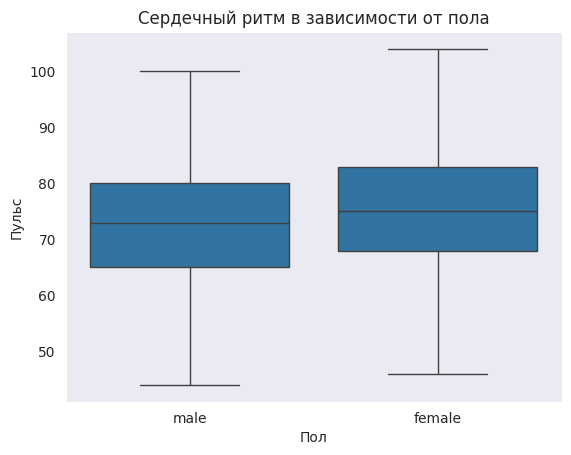

In [178]:
# Снова строим boxplot'ы
print("Почистили выбросы:")
sns.boxplot(x=df_cl['sex'], y=df_cl['heart_rate'])
plt.xlabel('Пол')
plt.ylabel('Пульс')
plt.title('Сердечный ритм в зависимости от пола')
plt.show()

In [179]:
# 6) провести анализ использую 2-3 группировки ( groupby) для получаения статистик и сделать выводы

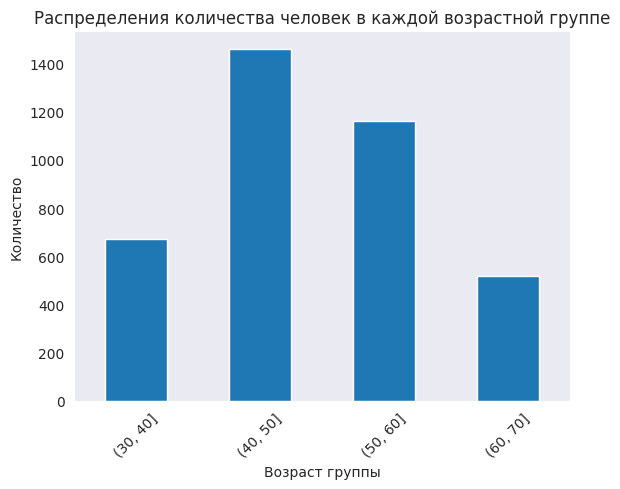

In [180]:
# Разделим возраста на интервалы: 4 интервала
age_groups = pd.cut(df_cl['age'], bins=range(30, 71, 10))
age_groups.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Возраст группы')
plt.ylabel('Количество')
plt.title('Распределения количества человек в каждой возрастной группе')
plt.xticks(rotation=45)
plt.show()


In [181]:
# Добавим доп. колонку к нашему датафрейму - говорит о том к какому интервалу принадлежит строчка (по возрасту)
df_cl['age_group'] = pd.cut(df_cl['age'], bins=range(30, 71, 10), labels=['30-40', '40-50', '50-60', '60-70'])
df_cl

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,age_group
0,54,male,yes,95,110/72,9.0,219.0,50-60
1,45,male,yes,64,121/72,9.0,248.0,40-50
2,58,male,yes,81,127.5/76,9.0,235.0,50-60
3,42,male,yes,90,122.5/80,9.0,225.0,40-50
4,42,male,yes,62,119/80,9.0,226.0,40-50
...,...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60.0,254.0,30-40
3896,49,male,yes,70,123/75,60.0,213.0,40-50
3897,56,male,yes,70,125/79,60.0,246.0,50-60
3898,50,male,yes,85,134/95,60.0,340.0,40-50


<Figure size 1200x600 with 0 Axes>

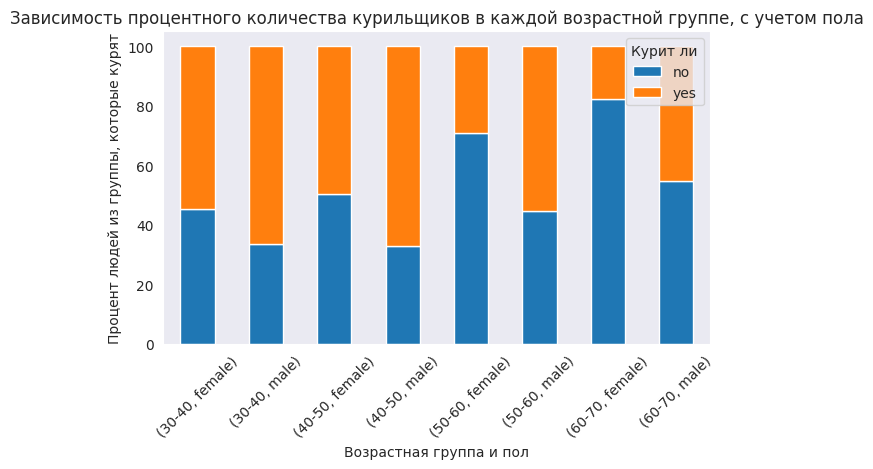

In [182]:
# Разделим возраста на группы:
age_sex_smoking = pd.crosstab(index=[df_cl['age_group'], df_cl['sex']], columns=df_cl['current_smoker'])
smoking_rate_by_age_gender = age_sex_smoking.div(age_sex_smoking.sum(axis=1), axis=0) * 100
plt.figure(figsize=(12, 6))
smoking_rate_by_age_gender.plot(kind='bar', stacked=True)
plt.title('Зависимость процентного количества курильщиков в каждой возрастной группе, с учетом пола')
plt.xlabel('Возрастная группа и пол')
plt.ylabel('Процент людей из группы, которые курят')
plt.xticks(rotation=45)
plt.legend(title='Курит ли') #Added a legend for better readability
plt.tight_layout() #Improved layout to prevent labels from overlapping.
plt.show()


current_smoker
no     74.219917
yes    75.572641
Name: heart_rate, dtype: float64


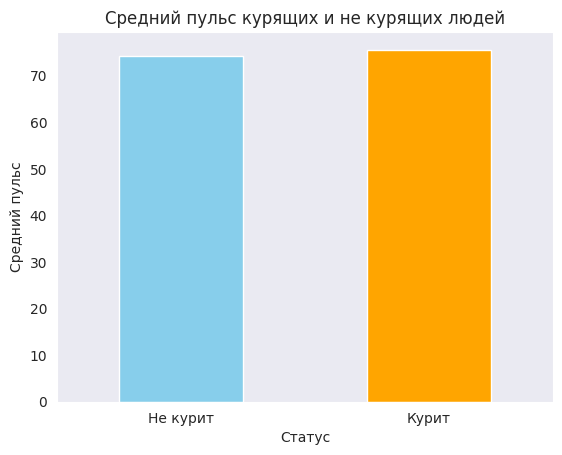

In [183]:
# Проверим срдений пульс курильщиков и не курильщиков:
avg_heart_rate = df_cl.groupby('current_smoker')['heart_rate'].mean()
print(avg_heart_rate)
avg_heart_rate.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Статус')
plt.ylabel('Средний пульс')
plt.title('Средний пульс курящих и не курящих людей')
plt.xticks([0, 1], ['Не курит', 'Курит'], rotation=0)
plt.show()

sex
female    239.567767
male      233.154106
Name: chol, dtype: float64


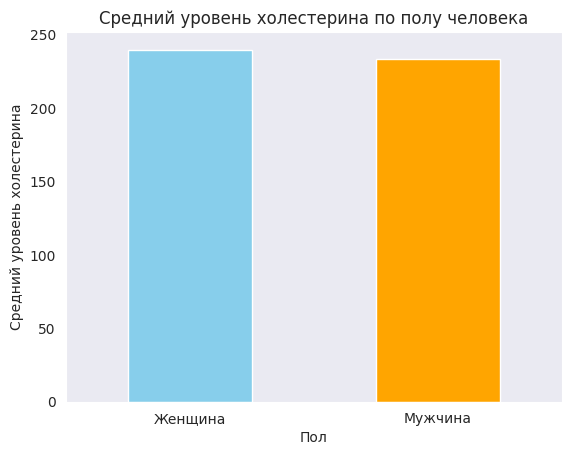

In [184]:
# Проверим срдений уровень холестерина для разных полов:
avg_heart_rate = df_cl.groupby('sex')['chol'].mean()
print(avg_heart_rate)
avg_heart_rate.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Пол')
plt.ylabel('Средний уровень холестерина')
plt.title('Средний уровень холестерина по полу человека')
plt.xticks([0, 1], ['Женщина', 'Мужчина'], rotation=0)
plt.show()

In [185]:
print("Выводы: Удобно работать с данными, разделенными на группы, поскольку это позволяет сказать о каких-то свойствах отдельной возрастной группы. \nК примеру - по графику \'Зависимость процентного количества курильщиков в каждой возрастной группе, \nс учетом пола\' мы видим, что процент курящих мужчин гораздо больше чем тот же процент курящих женщин, для любой возрастной категории. \nИ видим тенденцию к снижению процента курящих людей начиная от 30 к 70 годам")
print("Мы можем используя groupby и похожие опреации группировки данных искать статистики по группам - к примеру видим, что средний пульс не зависит от того, курит человек или нет. \nВидим также что средний уровень холестерина девушек чуть выше чем у парней.")

Выводы: Удобно работать с данными, разделенными на группы, поскольку это позволяет сказать о каких-то свойствах отдельной возрастной группы. 
К примеру - по графику 'Зависимость процентного количества курильщиков в каждой возрастной группе, 
с учетом пола' мы видим, что процент курящих мужчин гораздо больше чем тот же процент курящих женщин, для любой возрастной категории. 
И видим тенденцию к снижению процента курящих людей начиная от 30 к 70 годам
Мы можем используя groupby и похожие опреации группировки данных искать статистики по группам - к примеру видим, что средний пульс не зависит от того, курит человек или нет. 
Видим также что средний уровень холестерина девушек чуть выше чем у парней.


In [186]:
#7) Провести визуализацию, построить 3-4 графика, обязательно построить гистограммы и распредление данных, сделать выводы 

<Figure size 2000x1500 with 0 Axes>

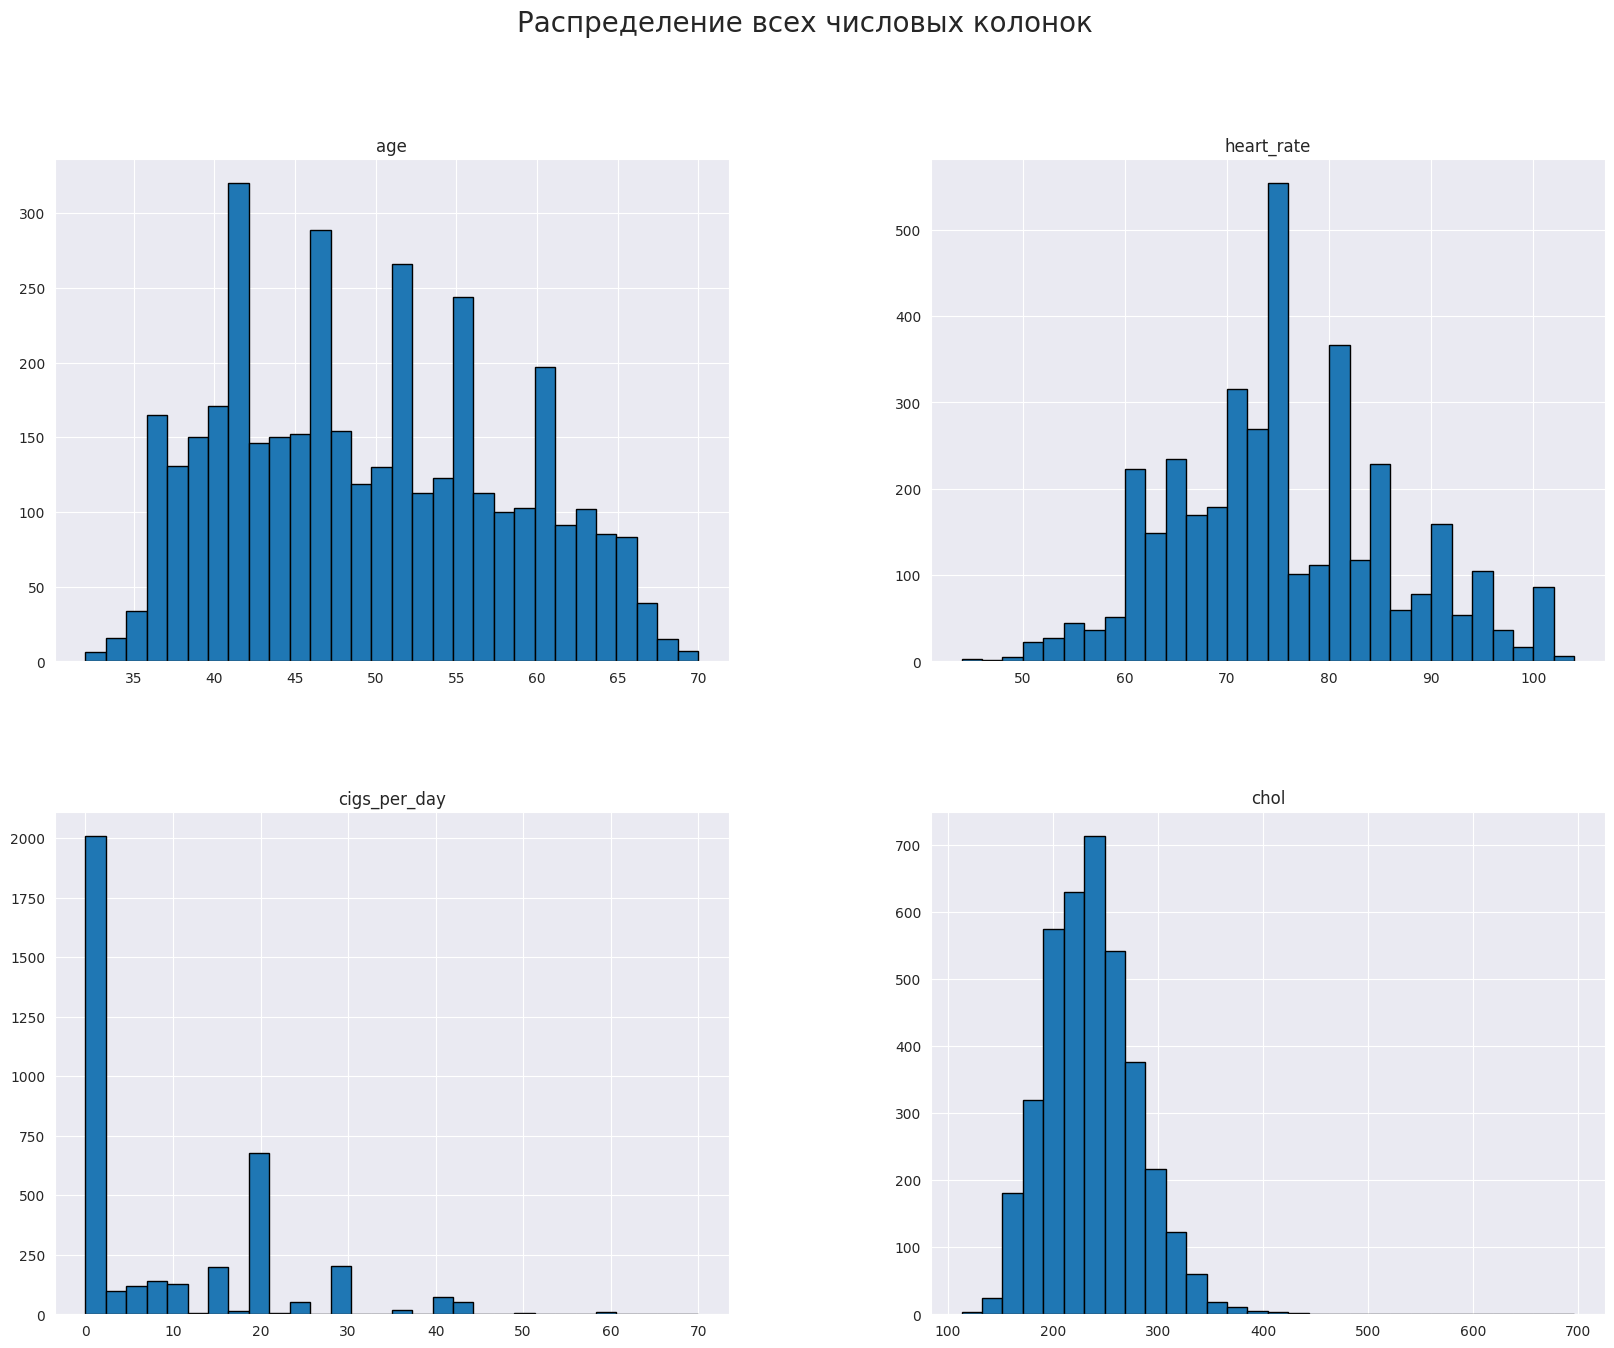

In [187]:
# Гистограмма всех столбцов:
plt.figure(figsize=(20, 15))
df_cl.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Распределение всех числовых колонок', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Количество мужчин в сравнении с количеством женщин в выборке, в зависимости от количества выкуриваемых в день сигарет')

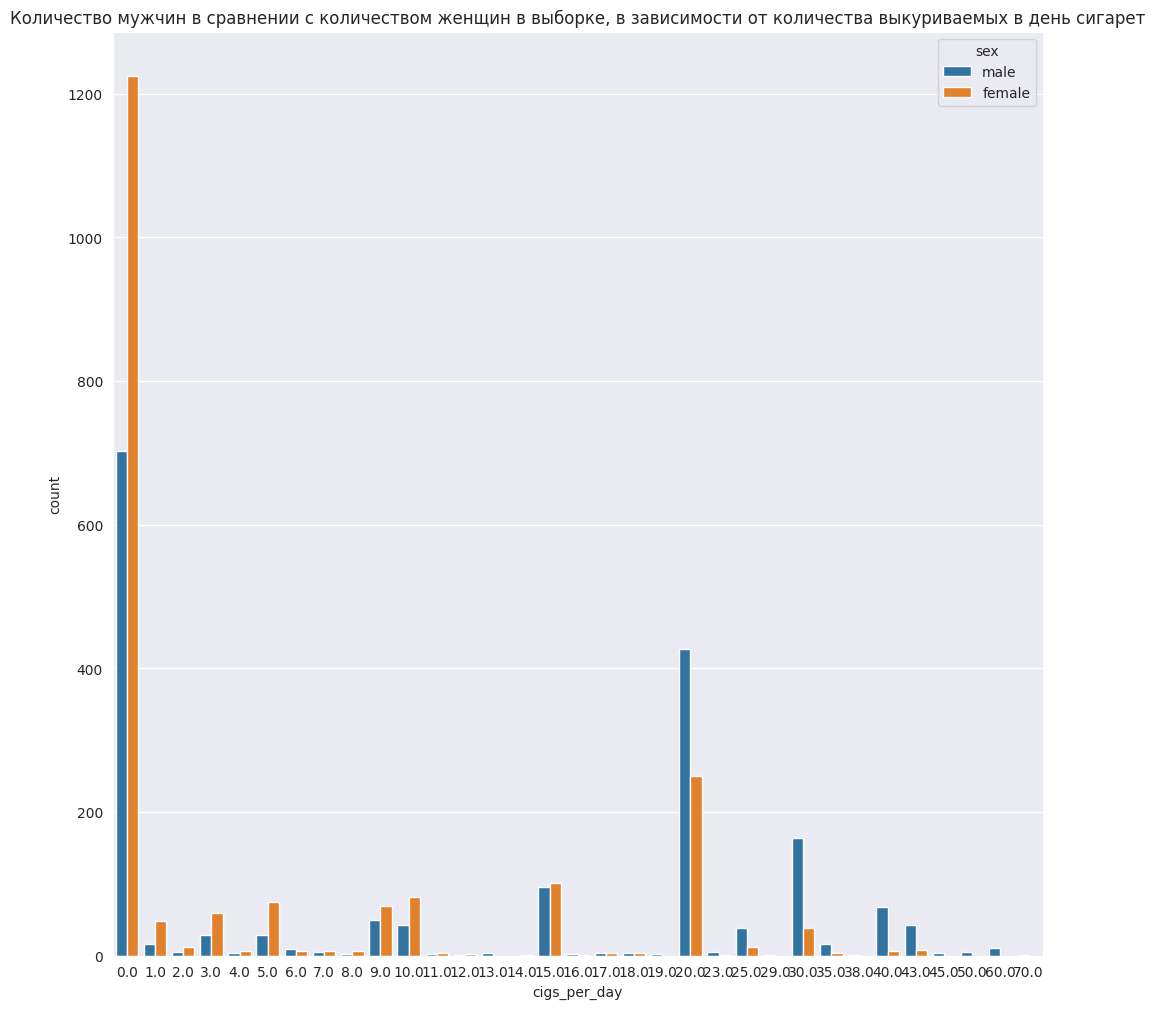

In [188]:
# Create a plot # Your code here
sns.set_style("dark")
plt.figure(figsize=(12,12))
plt.grid()
sns.countplot(data=df_cl,x=df_cl['cigs_per_day'],hue=df_cl.sex)
plt.title("Количество мужчин в сравнении с количеством женщин в выборке, в зависимости от количества выкуриваемых в день сигарет")


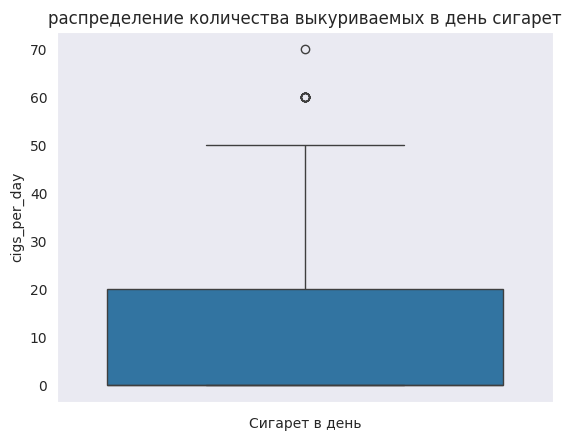

In [189]:
# распределение количества выкуриваемых в день сигарет
sns.boxplot(df_cl['cigs_per_day'])
plt.xlabel('Сигарет в день')
plt.title('распределение количества выкуриваемых в день сигарет')
plt.show()

In [190]:
df_cl['cigs_per_day'], df_cl['chol']

(0        9.0
 1        9.0
 2        9.0
 3        9.0
 4        9.0
         ... 
 3895    60.0
 3896    60.0
 3897    60.0
 3898    60.0
 3899    70.0
 Name: cigs_per_day, Length: 3814, dtype: float64,
 0       219.0
 1       248.0
 2       235.0
 3       225.0
 4       226.0
         ...  
 3895    254.0
 3896    213.0
 3897    246.0
 3898    340.0
 3899    210.0
 Name: chol, Length: 3814, dtype: float64)

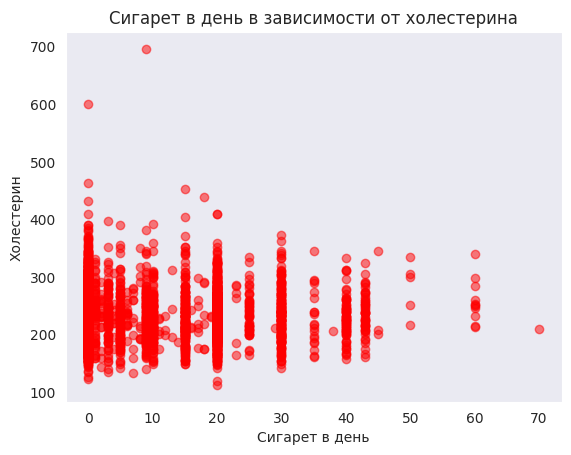

Корреляция между показателем количества выкуренных сигарет и холестерином:  -0.027418149335730013
Значит зависимости между этими двумя существенной зависимости нет


In [191]:
plt.scatter(df_cl['cigs_per_day'], df_cl['chol'], alpha=0.5, color='red')
plt.xlabel('Сигарет в день')
plt.ylabel('Холестерин')
plt.title('Сигарет в день в зависимости от холестерина')
plt.show()
print("Корреляция между показателем количества выкуренных сигарет и холестерином: ", df['cigs_per_day'].corr(df['chol']))
print("Значит зависимости между этими двумя существенной зависимости нет")

In [192]:
print("Выводы: python совмествно с библиотеками pandas, matplotlib и seaborn предоставляет удобные способы взаимодействия с данными,\n обработки и фильтрации выбрасов, визуализации и вычисления статистик")
print("С помощью boxplot-ов можно не только удобно отследить выбросы, но еще и понять закономерность распределения показателя")
print("Группировка помогает сказать конкретную зависимость двух параметров, применительно к разделенным данным. Так мы проанализировали количество курящих людей в каждой из возрастных групп, опираясь еще и на пол людей")


Выводы: python совмествно с библиотеками pandas, matplotlib и seaborn предоставляет удобные способы взаимодействия с данными,
 обработки и фильтрации выбрасов, визуализации и вычисления статистик
С помощью boxplot-ов можно не только удобно отследить выбросы, но еще и понять закономерность распределения показателя
Группировка помогает сказать конкретную зависимость двух параметров, применительно к разделенным данным. Так мы проанализировали количество курящих людей в каждой из возрастных групп, опираясь еще и на пол людей


##